### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr
key="dcbdde936e7866b9ae45c380c36a2f04c62bcc90"

In [3]:
!pip install --upgrade pandas_datareader


In [26]:
import requests
import pandas as pd

api_key = "dcbdde936e7866b9ae45c380c36a2f04c62bcc90"
symbol = "AAPL"

# Set date range
start_date = "2021-01-01"
end_date = "2025-02-21"

url = f"https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}&token={api_key}"

response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'date' to datetime format for better analysis
df["date"] = pd.to_datetime(df["date"])

print(df.head())  # Check first 5 rows


                       date   close      high      low    open     volume  \
0 2021-01-04 00:00:00+00:00  129.41  133.6116  126.760  133.52  143301887   
1 2021-01-05 00:00:00+00:00  131.01  131.7400  128.430  128.89   97664898   
2 2021-01-06 00:00:00+00:00  126.60  131.0499  126.382  127.72  155087970   
3 2021-01-07 00:00:00+00:00  130.92  131.6300  127.860  128.36  109578157   
4 2021-01-08 00:00:00+00:00  132.05  132.6300  130.230  132.43  105158245   

     adjClose     adjHigh      adjLow     adjOpen  adjVolume  divCash  \
0  126.409347  130.513524  123.820793  130.424048  143301887      0.0   
1  127.972247  128.685321  125.452070  125.901404   97664898      0.0   
2  123.664503  128.011222  123.451558  124.758533  155087970      0.0   
3  127.884334  128.577871  124.895287  125.383694  109578157      0.0   
4  128.988133  129.554684  127.210333  129.359322  105158245      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.

In [27]:
df.to_csv('AAPL.csv')

In [28]:
import pandas as pd

In [29]:
df=pd.read_csv('AAPL.csv')

In [30]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2021-01-04 00:00:00+00:00,129.41,133.6116,126.760,133.52,143301887,126.409347,130.513524,123.820793,130.424048,143301887,0.0,1.0
1,1,2021-01-05 00:00:00+00:00,131.01,131.7400,128.430,128.89,97664898,127.972247,128.685321,125.452070,125.901404,97664898,0.0,1.0
2,2,2021-01-06 00:00:00+00:00,126.60,131.0499,126.382,127.72,155087970,123.664503,128.011222,123.451558,124.758533,155087970,0.0,1.0
3,3,2021-01-07 00:00:00+00:00,130.92,131.6300,127.860,128.36,109578157,127.884334,128.577871,124.895287,125.383694,109578157,0.0,1.0
4,4,2021-01-08 00:00:00+00:00,132.05,132.6300,130.230,132.43,105158245,128.988133,129.554684,127.210333,129.359322,105158245,0.0,1.0


In [31]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1034,1034,2025-02-14 00:00:00+00:00,244.60,245.55,240.9900,241.25,40896227,244.60,245.55,240.9900,241.25,40896227,0.0,1.0
1035,1035,2025-02-18 00:00:00+00:00,244.47,245.18,241.8400,244.15,48822491,244.47,245.18,241.8400,244.15,48822491,0.0,1.0
1036,1036,2025-02-19 00:00:00+00:00,244.87,246.01,243.1604,244.66,32204215,244.87,246.01,243.1604,244.66,32204215,0.0,1.0
1037,1037,2025-02-20 00:00:00+00:00,245.83,246.78,244.2900,244.94,32316907,245.83,246.78,244.2900,244.94,32316907,0.0,1.0
1038,1038,2025-02-21 00:00:00+00:00,245.55,248.69,245.2200,245.95,53197431,245.55,248.69,245.2200,245.95,53197431,0.0,1.0


In [32]:
df1=df.reset_index()['close']

In [33]:
df1

,close
0,129.41
1,131.01
2,126.60
3,130.92
4,132.05
...,...
1034,244.60
1035,244.47
1036,244.87
1037,245.83


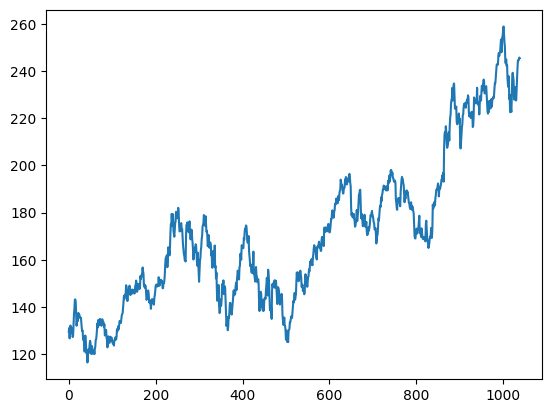

In [34]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [35]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [36]:
import numpy as np

In [37]:
df1

,close
0,129.41
1,131.01
2,126.60
3,130.92
4,132.05
...,...
1034,244.60
1035,244.47
1036,244.87
1037,245.83


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [39]:
print(df1)

[[0.09147624]
 [0.10269171]
 [0.07177906]
 ...
 [0.90081312]
 [0.90754241]
 [0.9055797 ]]


In [40]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [41]:
training_size,test_size

(675, 364)

In [42]:
train_data

array([[0.09147624],
       [0.10269171],
       [0.07177906],
       [0.10206084],
       [0.10998177],
       [0.08846208],
       [0.08720034],
       [0.10185055],
       [0.0879714 ],
       [0.07556428],
       [0.08040095],
       [0.10984158],
       [0.1437684 ],
       [0.15918968],
       [0.18617692],
       [0.18785925],
       [0.18014861],
       [0.14531053],
       [0.1093509 ],
       [0.12463199],
       [0.13059021],
       [0.12323006],
       [0.14741343],
       [0.14299734],
       [0.14404879],
       [0.13774008],
       [0.13339408],
       [0.13157157],
       [0.13325389],
       [0.1179728 ],
       [0.10150007],
       [0.09357914],
       [0.09470069],
       [0.06757325],
       [0.0665919 ],
       [0.06301696],
       [0.03245479],
       [0.0343474 ],
       [0.08012057],
       [0.06140474],
       [0.03995514],
       [0.02642647],
       [0.03546895],
       [0.        ],
       [0.03312071],
       [0.02537502],
       [0.03925417],
       [0.032

In [43]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [44]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [45]:
print(X_train.shape), print(y_train.shape)

(574, 100)
(574,)


(None, None)

In [46]:
print(X_test.shape), print(ytest.shape)

(263, 100)
(263,)


(None, None)

In [47]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [48]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - loss: 0.0473 - val_loss: 0.0154
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 0.0059 - val_loss: 0.0501
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - loss: 0.0043 - val_loss: 0.0196
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 0.0032 - val_loss: 0.0268
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - loss: 0.0030 - val_loss: 0.0092
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step - loss: 0.0029 - val_loss: 0.0065
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - loss: 0.0025 - val_loss: 0.0071
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.0026 - val_loss: 0.0044
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - loss: 0.0023 - val_loss: 0.0044
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0020 - val_loss: 0.0058
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - loss: 0.0022 - val_lo

In [53]:
import tensorflow as tf

In [54]:
tf.__version__

'2.18.0'

In [71]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [72]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [73]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

158.90227939039693

In [74]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

213.23630223001584

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Train RMSE: 158.90227939039693
Test RMSE: 213.23630223001584


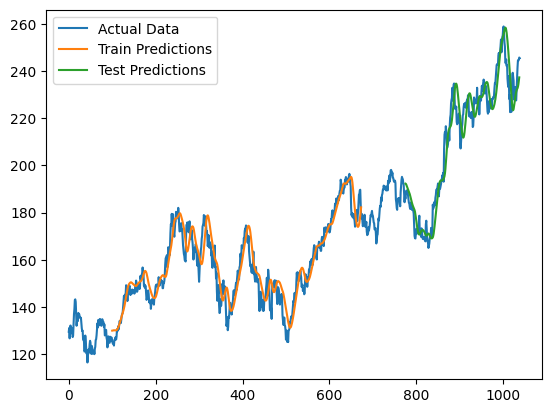

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

# Assuming df1, X_train, X_test, y_train, ytest, scaler, look_back, and model are properly initialized

# Perform predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform predictions back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE performance metrics
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Convert df1 back to its original scale
actual_data = scaler.inverse_transform(df1)

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot actual data correctly
plt.plot(actual_data, label="Actual Data")

# Plot predictions
plt.plot(trainPredictPlot, label="Train Predictions")
plt.plot(testPredictPlot, label="Test Predictions")

plt.legend()
plt.show()

In [75]:
len(test_data)

364

In [76]:
x_input=test_data[264:].reshape(1,-1)
x_input.shape


(1, 100)

In [77]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [78]:
temp_input

[0.7810879013037993,
 0.8176082994532455,
 0.7700126174120289,
 0.7740081312210852,
 0.7662273938034488,
 0.7741483246880697,
 0.7383288938735456,
 0.7669283611383712,
 0.7933548296649376,
 0.7898499929903268,
 0.7794055796999863,
 0.8056918547595685,
 0.8235665218000842,
 0.8090564979671949,
 0.8116500771064069,
 0.8316276461516895,
 0.8420019627085379,
 0.8376559652320205,
 0.8019066311509885,
 0.8005747932146362,
 0.8064629188279827,
 0.8204121687929343,
 0.8223047805972242,
 0.7972802467405019,
 0.7679097154072622,
 0.7468806953595962,
 0.7405719893452966,
 0.750665918968176,
 0.7455488574232442,
 0.7789149025655405,
 0.7752698724239452,
 0.7561334641805691,
 0.7561334641805691,
 0.7623720734613769,
 0.7841020608439647,
 0.7615309126594701,
 0.7827001261741205,
 0.7845226412449181,
 0.7895696060563578,
 0.7862049628487314,
 0.7956680218701809,
 0.8166970419178469,
 0.8320482265526429,
 0.831136969017244,
 0.8479601850553767,
 0.863802046824618,
 0.8852516472732374,
 0.8877751296789

In [79]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.87528425]
101
1 day input [0.8176083  0.77001262 0.77400813 0.76622739 0.77414832 0.73832889
 0.76692836 0.79335483 0.78984999 0.77940558 0.80569185 0.82356652
 0.8090565  0.81165008 0.83162765 0.84200196 0.83765597 0.80190663
 0.80057479 0.80646292 0.82041217 0.82230478 0.79728025 0.76790972
 0.7468807  0.74057199 0.75066592 0.74554886 0.7789149  0.77526987
 0.75613346 0.75613346 0.76237207 0.78410206 0.76153091 0.78270013
 0.78452264 0.78956961 0.78620496 0.79566802 0.81669704 0.83204823
 0.83113697 0.84796019 0.86380205 0.88525165 0.88777513 0.88798542
 0.88658349 0.91399131 0.92114117 0.91216879 0.92247301 0.92366466
 0.94406281 0.96116641 0.92310388 0.93530071 0.96824618 0.97371372
 0.99425207 1.         0.97595682 0.95219403 0.93971681 0.89366326
 0.89022852 0.90172438 0.88216739 0.88560213 0.84459554 0.82742184
 0.81957101 0.85174541 0.78438245 0.79643909 0.74498808 0.75332959
 0.75213795 0.74596944 0.79559793 0.85447918 0.86218982 0.8497827
 0.83863732 0.78263003 0.81620636 

In [80]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [81]:
import matplotlib.pyplot as plt

In [82]:
len(df1)

1039

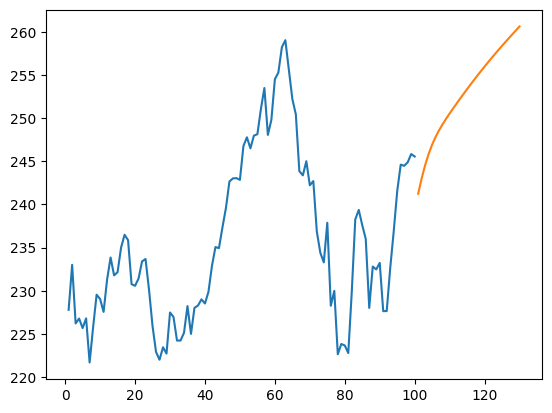

In [84]:
plt.plot(day_new,scaler.inverse_transform(df1[939:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

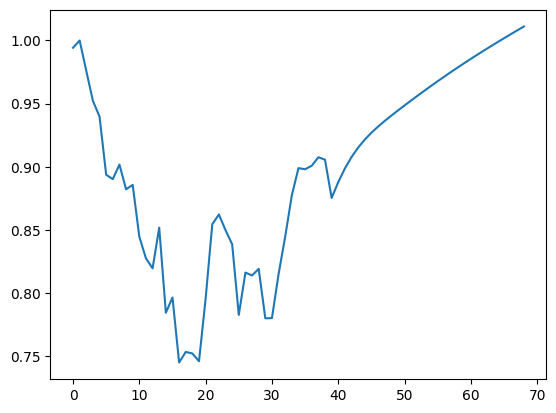

In [86]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [87]:
df3=scaler.inverse_transform(df3).tolist()

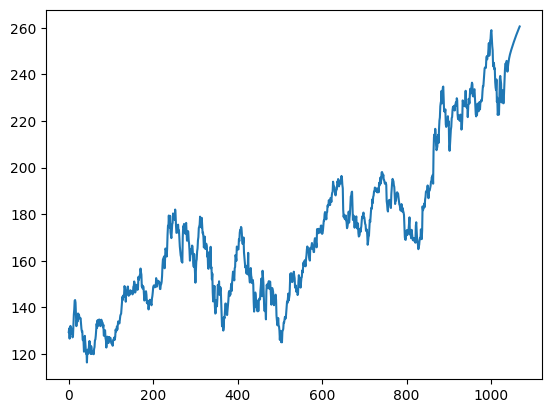

In [88]:
plt.plot(df3)